In [75]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from palettable.colorbrewer.qualitative import Set2_7
from palettable.colorbrewer.qualitative import Dark2_7

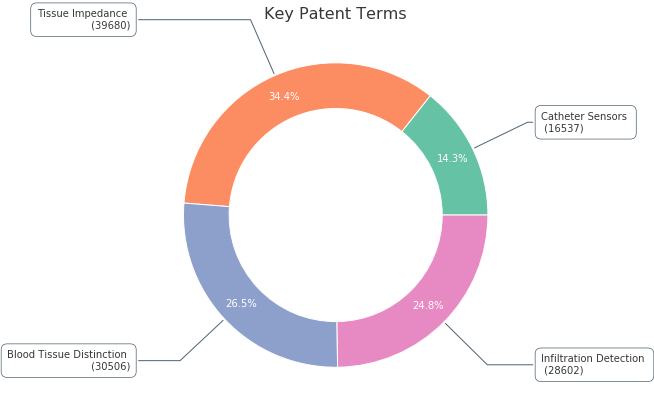

In [136]:
width = 10
height = 10
mpl.rcParams['figure.figsize'] = [width, height]

# Patent Search Terms

numCatSen = 16537 # Catheter sensors
numTisImp = 39680 # Tissue impedance
numTisDis = 30506  # Blood tissue distinction
numInfDet = 28602 # Infiltration detection

numIntVen = 60579 # Intravenous
numCat = 54822    # Catheter

# create data
names='Catheter Sensors', 'Tissue Impedance', 'Blood Tissue Distinction', 'Infiltration Detection',
size=[numCatSen, numTisImp, numTisDis, numInfDet]

fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(aspect="equal"))

# Create a circle for the center of the plot

wedges, texts, autotexts = plt.pie(size,autopct='%1.1f%%', pctdistance=0.85, 
                                   textprops=dict(color="w"), wedgeprops=dict(width=sizeVal, edgecolor='w'),
                                   colors=Set2_7.hex_colors)

bbox_props = dict(boxstyle="round,pad=0.6", fc="w", ec='xkcd:slate', lw=0.72)

kw = dict(arrowprops=dict(arrowstyle="-", color='xkcd:slate'),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate("{} \n ({})".format(names[i], size[i]), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, color= 'xkcd:dark grey', **kw)


ax.set_title('Key Patent Terms', fontsize=16, color= 'xkcd:dark grey')

p=plt.gcf()

plt.show()

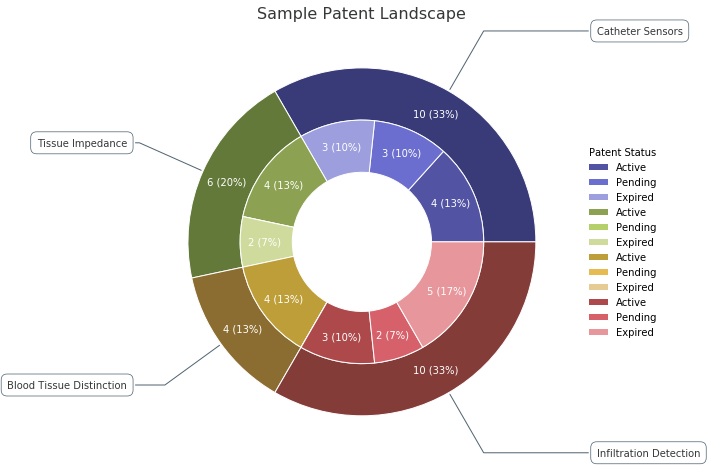

In [135]:
# Active, Pending, Expired
numSmpCatSen = [4, 3, 3] # Sample Landscape Catheter Sensors
numSmpTisImp = [4, 0, 2] # Sample Landscape Tissue Impedance
numSmpTisDis = [4, 0, 0] # Sample Landscape Tissue Distinction
numSmpInfDet = [3, 2, 5] # Sample Landscape Infiltration Detection

# create data
patentNames='Catheter Sensors', 'Tissue Impedance', 'Blood Tissue Distinction', 'Infiltration Detection'
patentArray=np.array([numSmpCatSen, numSmpTisImp, numSmpTisDis, numSmpInfDet])

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

sizeVal = 0.3
cmapb = plt.get_cmap("tab20b")
cmapc = plt.get_cmap("tab20c")
outer_colors = cmapb(np.arange(4)*4)
inner_colors = cmapb(np.array([1, 2, 3, 5, 6, 7, 9, 10,11, 13, 14, 15]))
# inner_colors = cmapc(np.array([17, 18, 19, 17, 18, 19, 17, 18, 19, 17, 18, 19]))
status = ['Active', 'Pending', 'Expired','Active', 'Pending', 'Expired','Active', 'Pending', 'Expired',
         'Active', 'Pending', 'Expired']

wedges, texts, autotexts = ax.pie(patentArray.sum(axis=1), radius=1, 
       autopct=lambda p: '{:.0f} ({:.0f}%)'.format(p /100 * patentArray.sum(), p) if p > 0 else '',
       pctdistance=0.85, colors=outer_colors,
       textprops=dict(color="w"), wedgeprops=dict(width=sizeVal, edgecolor='w'))

wedges2, texts2, autotexts2 = ax.pie(patentArray.flatten(), radius=1-sizeVal, 
       autopct=lambda p: '{:.0f} ({:.0f}%)'.format(p /100 * patentArray.sum(), p) if p > 0 else '', 
       pctdistance=0.8, colors=inner_colors,
       textprops=dict(color="w"), wedgeprops=dict(width=sizeVal, edgecolor='w'))

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate("{}".format(patentNames[i]), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, color= 'xkcd:dark grey', **kw)

ax.legend(wedges2, status,
          title="Patent Status",
          loc="center left",
          frameon=False,
          bbox_to_anchor=(1, 0, 0.5, 1))
    
ax.set_title('Sample Patent Landscape', fontsize=16, color= 'xkcd:dark grey')
plt.show()

